In [ ]:
%matplotlib inline


# Style sheets reference


This script demonstrates the different available style sheets on a
common set of example plots: scatter plot, image, bar graph, patches,
line plot and histogram,


<ipython-input-1-4d97bcd195d7>:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
<ipython-input-1-4d97bcd195d7>:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
<ipython-input-1-4d97bcd195d7>:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see t

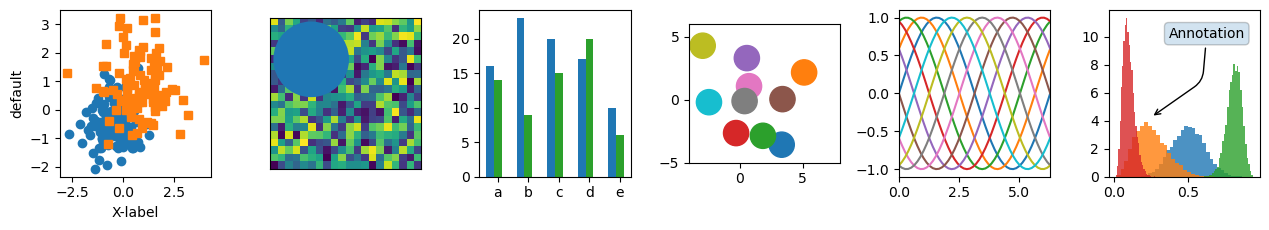

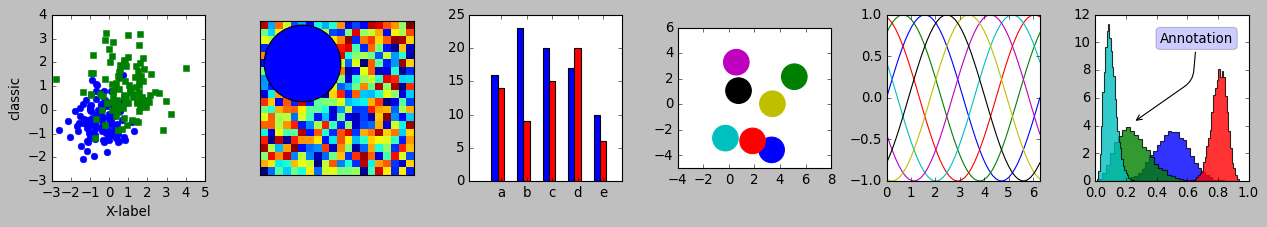

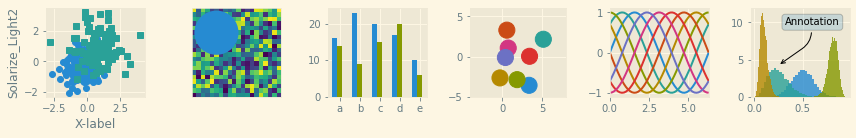

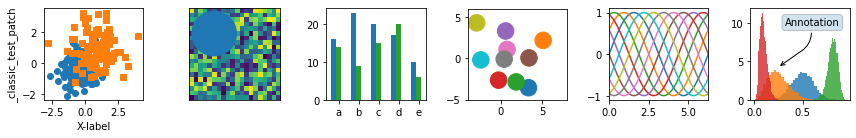

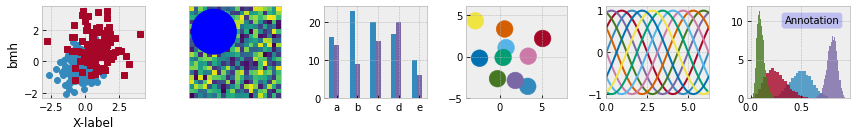

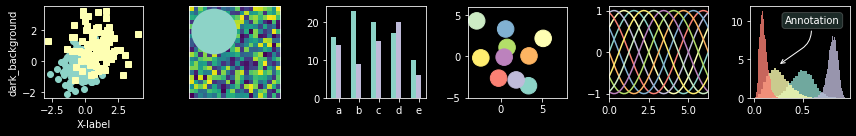

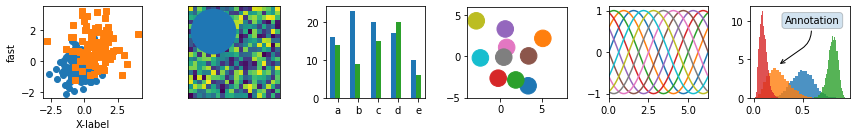

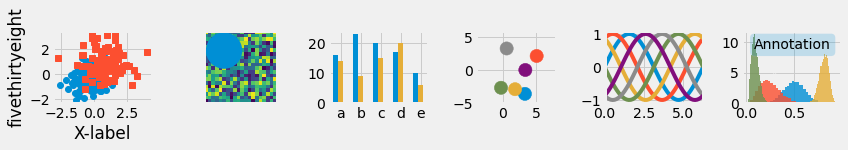

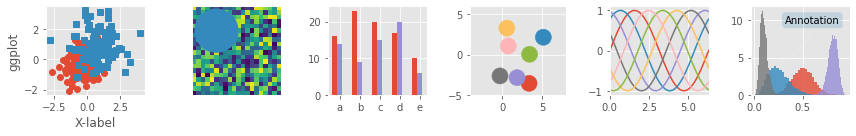

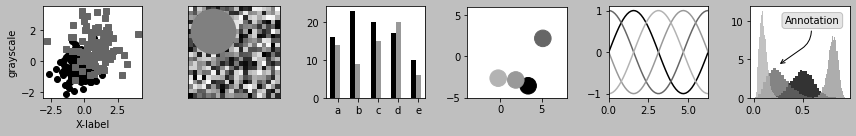

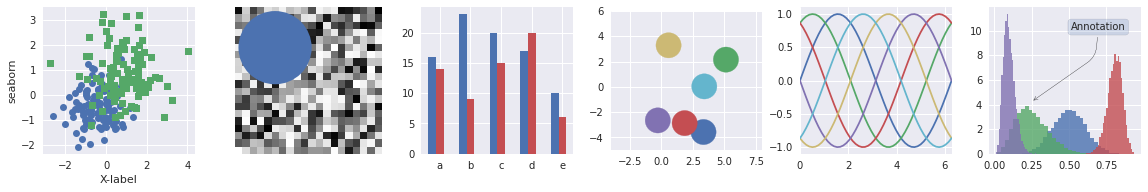

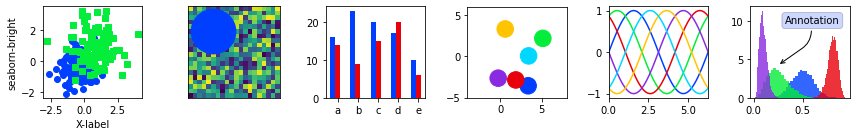

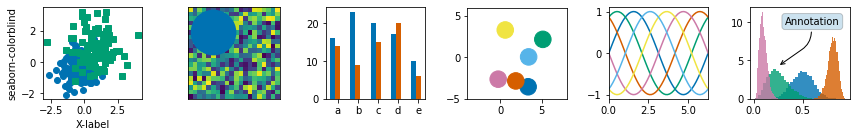

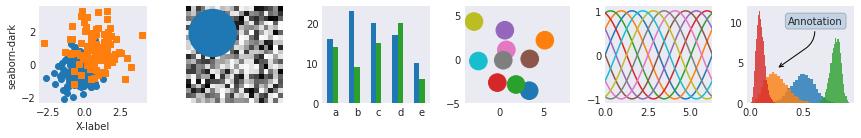

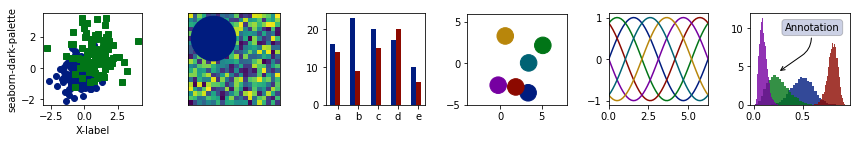

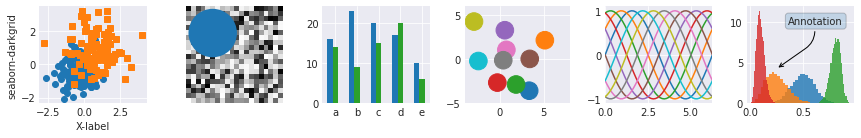

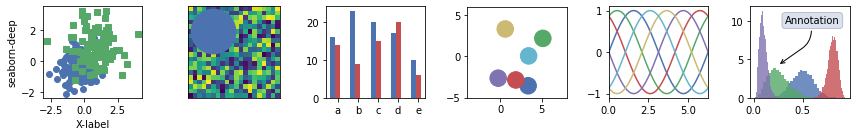

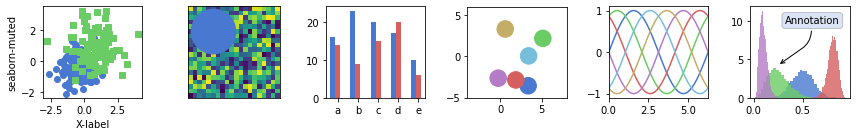

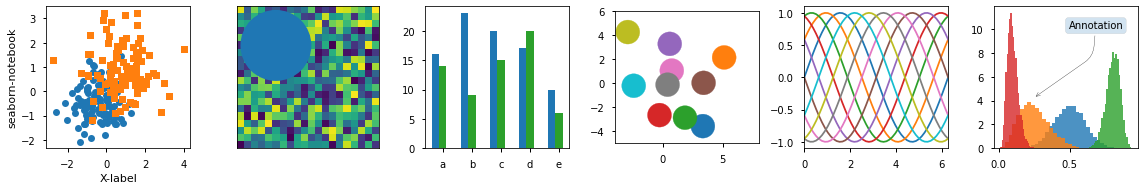

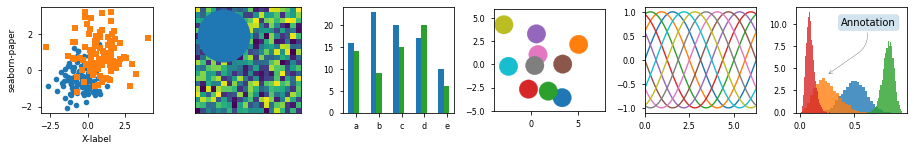

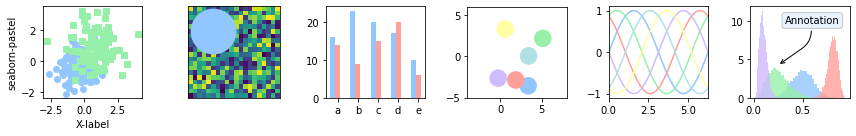

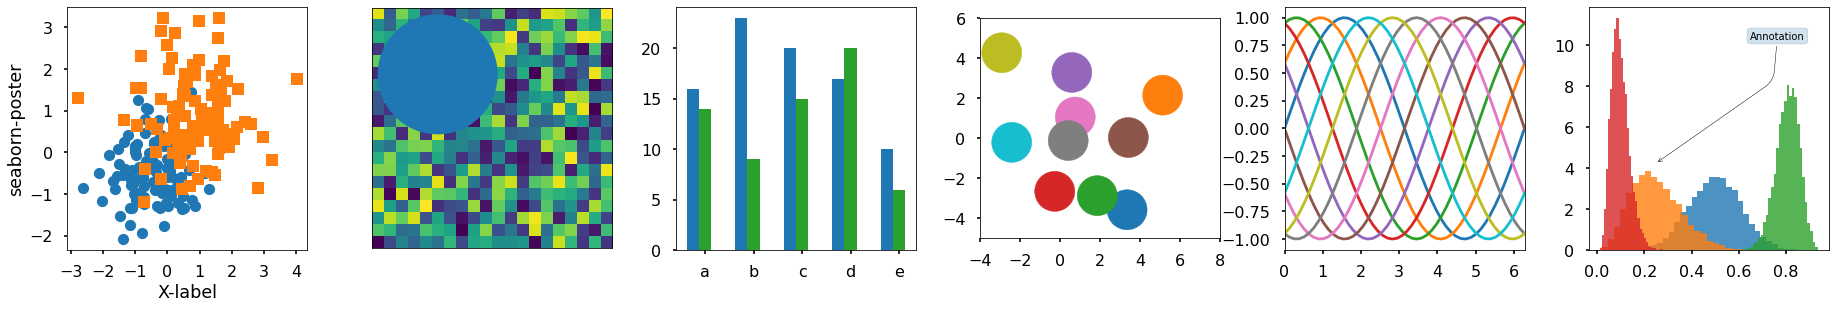

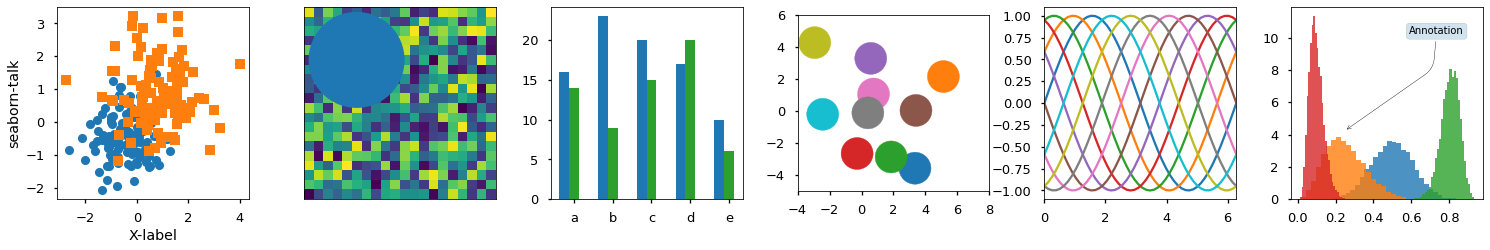

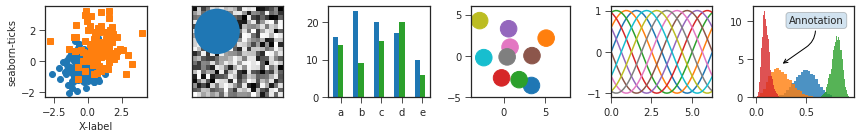

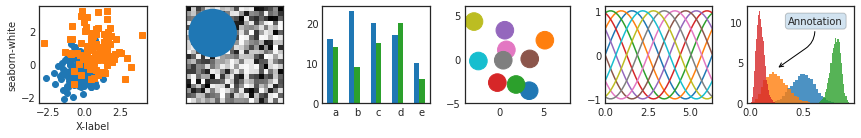

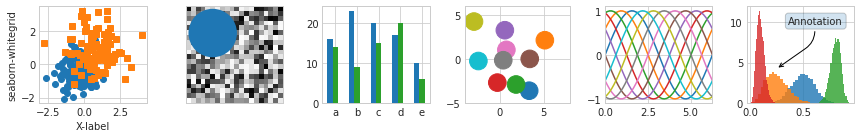

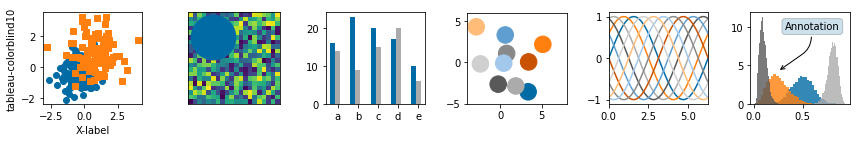

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25),
                xytext=(0.9, 0.9), textcoords=ax.transAxes,
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    plot_image_and_patch(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    style_list = ['default', 'classic'] + sorted(
        style for style in plt.style.available if style != 'classic')

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)

    plt.show()